# Linear Regression

In [116]:
#normal library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#library to manage dataset imports
from sklearn.model_selection import train_test_split

In [106]:
# if no dataset availbale the generate a simple linear random dataset.
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

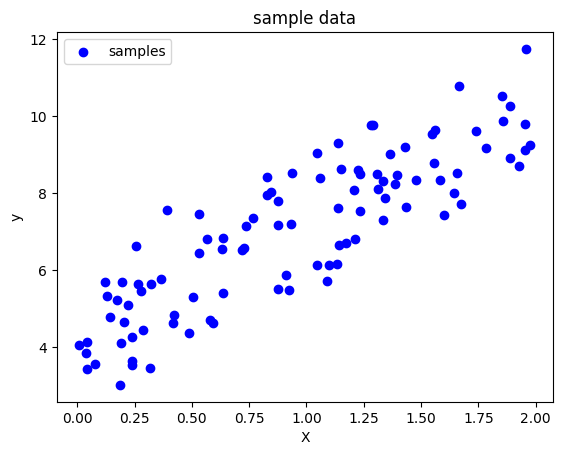

In [137]:
plt.scatter(X, y, color="blue", label="samples")
plt.xlabel('X')
plt.ylabel('y')
plt.title('sample data')
plt.legend()
plt.show()

In [139]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=62)

In [140]:
def predict(x, w, b):
    """ X: Input features
        w: Weights (slope)
        b: Bias (intercept) """
    pred = np.dot(x, w) + b
    return pred

In [141]:
def loss_function(y_true, y_pred):
    """
    y_true: Actual target values
    y_pred: Predicted target values
    """
    loss = np.mean((y_true - y_pred) ** 2)
    
    return loss

In [125]:
def update_weights(X, y, w, b, lr):
    """
    X: Input features
    y: Actual target values
    w: Current weights
    b: Current bias
    learning_rate: Step size for gradient update
    """
    # Number of samples
    m = len(y)
    # Predicted values
    y_pred = predict(X, w, b)
    # Compute gradients
    dw = (-2/m) * np.dot(X.T, (y - y_pred))
    db = (-2/m) * np.sum(y - y_pred)
    # Update weights and bias
    w -= lr * dw
    b -= lr * db
    return w, b

In [126]:
def train(X, y, lr=0.01, n_iters=1000):
    """
    X: Input features
    y: Target values
    lr: Step size for gradient descent
    n_iters: Number of iterations for training
    """
    # Initialize weights and bias
    w = np.zeros((X.shape[1], 1))
    b = 0
    
    loss_history = [] # store the loss at each iteration
    saved_lines = []  # store model predictions every 100 iterations
    
    # Gradient descent loop
    for i in range(n_iters):
        # Predict and compute loss
        y_pred = predict(X, w, b)
        loss = loss_function(y, y_pred)
        loss_history.append(loss)
        
        # Update weights and bias
        w, b = update_weights(X, y, w, b, lr)
        
        # Save predictions every 10 iterations
        if i % 10 == 0:
            saved_lines.append((i, w.copy(), b))
            print(f"Iteration {i}: Loss = {loss}")
    
    return w, b, loss_history, saved_lines

In [143]:
# model training
n_iters = 100
lr = 0.01
w, b, loss_history, saved_lines = train(X_train, y_train, lr, n_iters)

Iteration 0: Loss = 56.30934980283523
Iteration 10: Loss = 23.79662843333072
Iteration 20: Loss = 10.513075428687982
Iteration 30: Loss = 5.0803149298677095
Iteration 40: Loss = 2.8531565837737283
Iteration 50: Loss = 1.9351961411832896
Iteration 60: Loss = 1.5522072630283081
Iteration 70: Loss = 1.3880879993128032
Iteration 80: Loss = 1.3137646692312885
Iteration 90: Loss = 1.2765183402578564


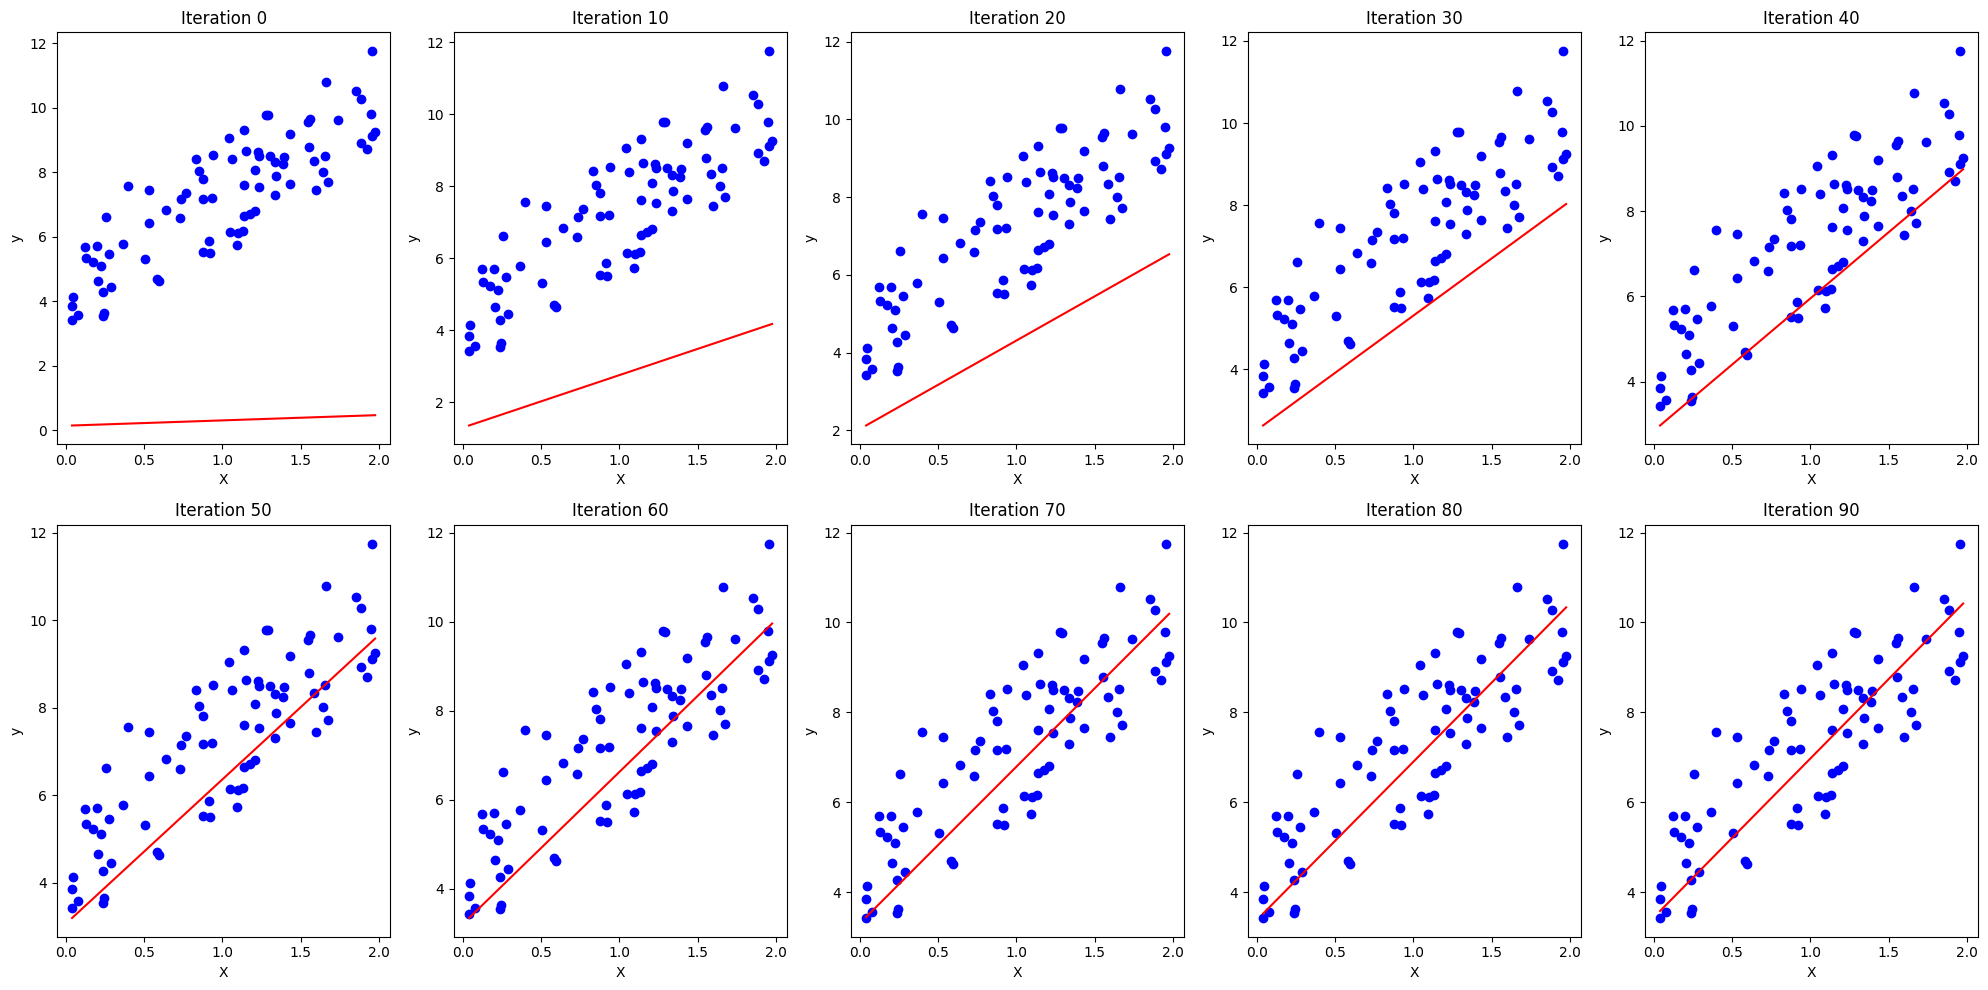

In [144]:
# Plotting regression lines every 10 iterations
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.ravel()  # Flatten the 2x5 grid for easier access

for idx, (iteration, w, b) in enumerate(saved_lines):
    ax = axes[idx]
    # Plot the training data
    ax.scatter(X_train, y_train, color='blue', label='Training data')
    
    # Plot the regression line
    line_x = np.linspace(X_train.min(), X_train.max(), 100)
    line_y = predict(line_x.reshape(-1, 1), w, b)
    ax.plot(line_x, line_y, color='red', label=f'Iteration {iteration}')
    
    ax.set_title(f'Iteration {iteration}')
    ax.set_xlabel('X')
    ax.set_ylabel('y')

plt.tight_layout()
plt.show()

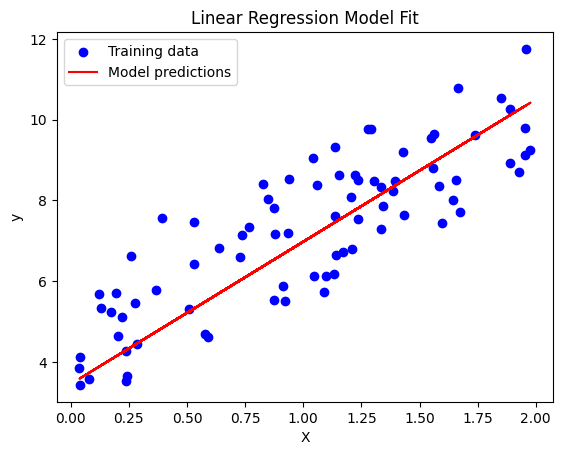

In [146]:
# Plot the model's predictions
plt.scatter(X_train, y_train, color="blue", label="Training data")
plt.plot(X_train, predict(X_train, w, b), color="red", label="Model predictions")
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Model Fit')
plt.legend()
plt.show()

 **Evaluate the Model on Test Data**

In [149]:
# Predict on the test set
y_test_pred = predict(0.74, w, b)
y_test_pred

array([[6.06219039]])

Test Loss: 0.6752751637895639


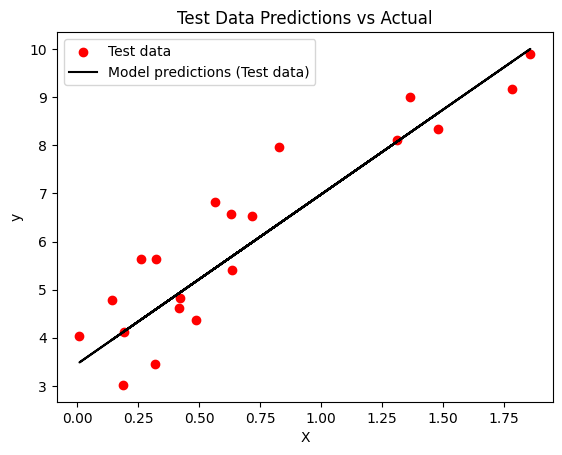

In [150]:
# Predict on the test set
y_test_pred = predict(X_test, w, b)

# Compute test loss
test_loss = loss_function(y_test, y_test_pred)
print(f"Test Loss: {test_loss}")

# Visualize predictions on the test data
plt.scatter(X_test, y_test, color="red", label="Test data")
plt.plot(X_test, y_test_pred, color="black", label="Model predictions (Test data)")
plt.xlabel('X')
plt.ylabel('y')
plt.title('Test Data Predictions vs Actual')
plt.legend()
plt.show()